# Determining Static Equilibrium

## Introduction

When analyzing physical structures, it is crucial to understand the mechanics keeping them stable. Applied forces on a floor, a beam, or any other structure, create reaction forces and moments. These reactions are the structure resisting movement without breaking. In cases where structures do not move despite having forces applied to them, `Newton’s second law`states that both the acceleration and sum of forces in all directions in the system must be zero.

## Objectives

#### Todo's:

* In this notebook, vectors and moments will be created using `NumPy` arrays
* Problems involving cables and floors holding up structures will be solved
* `NumPy` matrices will be used to isolate unkowns
* `NumPy` functions will be used to perform linear algebra operations

#### Learning outcomes

* How to represent points, vectors, and moments with `NumPy`
* How to find the `normal of vectors`
* Using `NumPy` to compute matrix calculations

## Requirements

* NumPy
* Matplotlib

In this notebook, the following NumPy tools will be put to use:

* `np.linalg.norm`: this function determines the measure of vector magnitude
* `np.cross`: this function takes two matrices and produces the cross product

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Solving equilibrium with Newton’s second law

The potential model consists of a beam under a sum of forces and moments which can be started off by analyzing this system with Newton’s second law:

$\sum{\text{force}} = \text{mass} \times \text{acceleration}$

In order to simplify the examples looked at, assume they are static, with acceleration = 0. Due to our system existing in three dimensions, consider forces being applied in each of these dimensions. This means that these forces can be represent as vectors. The same conclusion can be inferred for moments, which result from forces being applied a certain distance away from an object’s center of mass.

Assume that the force `F` is represented as a three-dimensional vector

$F = (F_x, F_y, F_z)$

where each of the three components represent the magnitude of the force being applied in each corresponding direction. Assume also that each component in the vector

$r = (r_x, r_y, r_z)$

is the distance between the point where each component of the force is applied and the centroid of the system. Then, the moment can be computed by

$r \times F = (r_x, r_y, r_z) \times (F_x, F_y, F_z)$

Start with some simple examples of force vectors

In [2]:
force_a = np.array([1, 0, 0])
force_b = np.array([0, 1, 0])
print(f"{force_a=}")
print(f"{force_b=}")

force_a=array([1, 0, 0])
force_b=array([0, 1, 0])


This defines `force_a` as being a vector with magnitude of 1 in the `x` direction and `force_b` as magnitude 1 in the `y` direction.

It may be helpful to visualize these forces in order to better understand how they interact with each other. Matplotlib is a library with visualization tools that can be utilized for this purpose. Quiver plots will be used to demonstrate three dimensional vectors, but the library can also be used for two dimensional demonstrations.

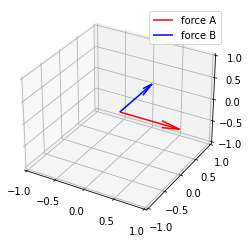

In [3]:
fig = plt.figure()

d3 = fig.add_subplot(projection="3d")

d3.set_xlim(-1, 1)
d3.set_ylim(-1, 1)
d3.set_zlim(-1, 1)

x, y, z = np.array([0, 0, 0]) # defining the point of application.  Make it the origin

u, v, w = force_a # breaking the force vector into individual components
d3.quiver(x, y, z, u, v, w, color="r", label="force A")

u, v, w = force_b
d3.quiver(x, y, z, u, v, w, color="b", label="force B")

plt.legend()
plt.show()

There are two forces emanating from a single point. In order to simplify this problem, add them together to find the sum of forces. Note that both `force_a` and `force_b` are three-dimensional vectors, represented by NumPy as arrays with three components.

Because NumPy is meant to simplify and optimize operations between vectors, the sum of these two vectors can be easily computed as follows:

In [4]:
force_c = force_a + force_b
print(f"{force_c=}")

force_c=array([1, 1, 0])


Force C now acts as a single force that represents both A and B that can be verified by plotting the result.

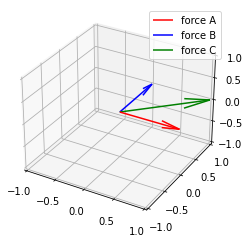

In [5]:
fig = plt.figure()

d3 = fig.add_subplot(projection="3d")

d3.set_xlim(-1, 1)
d3.set_ylim(-1, 1)
d3.set_zlim(-1, 1)

x, y, z = np.array([0, 0, 0])

u, v, w = force_a
d3.quiver(x, y, z, u, v, w, color="r", label="force A")

u, v, w = force_b
d3.quiver(x, y, z, u, v, w, color="b", label="force B")

u, v, w = force_c
d3.quiver(x, y, z, u, v, w, color="g", label="force C")

plt.legend()
plt.show()

However, the goal is equilibrium. This means that the sum of forces are expected to be `(0, 0, 0)` or else your object will experience acceleration. Therefore, there needs to be another force that counteracts the prior ones.

This problem can be written as $A+B+R=0$ with `R` being the reaction force that solves the problem. In this example this would mean:

$(1, 0, 0) + (0, 1, 0) + (R_x, R_y, R_z) = (0, 0, 0)$

Broken into `x, y, and z` components this gives:


$1+0+R_x=0$

$0+1+R_y=0$

$0+0+R_z=0$

solving for $R_x$, $R_y$, and $R_z$ gives you a vector $R$ of $(-1, -1, 0)$

If plotted, the forces seen in prior examples should be nullified. Only if there is no force remaining is the system considered to be in equilibrium.

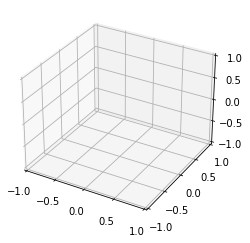

In [6]:
R = np.array([-1, -1, 0])

fig = plt.figure()

d3 = fig.add_subplot(projection="3d")
d3.set_xlim(-1, 1)
d3.set_ylim(-1, 1)
d3.set_zlim(-1, 1)

x, y, z = np.array([0, 0, 0])

u, v, w = force_a + force_b + R # add them all together for sum of forces
d3.quiver(x, y, z, u, v, w)

plt.show()

The empty graph signifies that there are no outlying forces. This denotes a system in equilibrium.

## Solving Equilibrium as a sum of moments

Next let’s move to a more complicated application. When forces are not all applied at the same point, moments are created.

Similar to forces, these moments must all sum to zero, otherwise rotational acceleration will be experienced. Similar to the sum of forces, this creates a linear equation for each of the three coordinate directions in space.

A simple example of this would be from a force applied to a stationary pole secured in the ground. The pole does not move, so it must apply a reaction force. The pole also does not rotate, so it must also be creating a reaction moment. Solve for both the reaction force and moments.

Lets say a `5N` force is applied perpendicularly `2m` above the base of the pole.

In [7]:
f = 5 # Force in newtons
L = 2 # Length of the pole

R = 0 - f
M = 0 - f * L
print(f"Reaction force = {R}")
print(f"Reaction moment = {M}")

Reaction force = -5
Reaction moment = -10


#### Finding values with physical properties

Let's say that instead of a force acting perpendicularly to the beam, a force was applied to the pole through a wire that was also attached to the ground. Given the tension in this cord, all that is needed to solve this problem are the physical locations of these objects.

<img src="data/sample/static_eqbm.png">

In response to the forces acting upon the pole, the base generated reaction forces in the x and y directions, as well as a reaction moment.

Denote the base of the pole as the origin. Now, say the cord is attached to the ground 3m in the x direction and attached to the pole 2m up, in the z direction.

Define these points in space as NumPy arrays, and then use those arrays to find directional vectors.

In [9]:
pole_base = np.array([0, 0, 0])
cord_base = np.array([3, 0, 0])
cord_connection = np.array([0, 0, 2])

pole_direction = cord_connection - pole_base
print(f"{pole_direction=}")

cord_direction = cord_base - cord_connection
print(f"{cord_direction=}")

pole_direction=array([0, 0, 2])
cord_direction=array([ 3,  0, -2])


In order to use these vectors in relation to forces, they must be converted into unit vectors. Unit vectors have a magnitude of one, and convey only the direction of the forces.

In [11]:
cord_unit = cord_direction / np.linalg.norm(cord_direction)
print(f"{cord_unit=}")

cord_unit=array([ 0.83205029,  0.        , -0.5547002 ])


This direction can be then multiplied with the magnitude of the force in order to find the force vector.

Let’s say the cord has a tension of `5N`:

In [12]:
cord_tension = 5
force_cord = cord_unit * cord_tension
print(f"{force_cord=}")

force_cord=array([ 4.16025147,  0.        , -2.77350098])


In order to find the moment, the cross product of the force vector and the radius will be required.

In [14]:
moment_cord = np.cross(force_cord, pole_direction)
print(f"{moment_cord=}")

moment_cord=array([ 0.        , -8.32050294,  0.        ])


Now all that is needed to do is find the reaction force and moment.

In [15]:
equilibrium = np.array([0, 0, 0])
R = equilibrium - force_cord
M = equilibrium - moment_cord
print(f"Reaction force = {R}")
print(f"Reaction moment = {M}")

Reaction force = [-4.16025147  0.          2.77350098]
Reaction moment = [0.         8.32050294 0.        ]
